# CSI4106 Assignment 2

## Group 24

|Name|Student No.|Email
|----|-----------|-----
|Hongyi Lin| 300053082| hlin087@uottawa.ca
|Rodger Retanal| 300052309| rreta014@uottawa.ca

In [3]:
import numpy as np
import pandas as pd
import random as python_random
import shutil
import os
import datetime
from PIL import Image
from multiprocessing import cpu_count
from joblib import Parallel, delayed
from collections import Counter
from matplotlib import pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, mean_absolute_error

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# for reproducibility purposes
SEED = 123
tf.random.set_seed(SEED)

# load tensorboard extension
%reload_ext tensorboard
# specify the log directory where the tensorboard logs will be written
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 3868), started 0:03:23 ago. (Use '!kill 3868' to kill it.)

#### Loading the relevant datasets (15/100)

train_set.shape = (15026, 4)
val_set.shape = (3757, 4)
test_set.shape = (4696, 4)
columns: Index(['age', 'ethnicity', 'gender', 'img_name'], dtype='object')

gender distribution in train_set:
 0    2456
1    2240
Name: gender, dtype: int64
gender distribution in val_set:
 0    1965
1    1792
Name: gender, dtype: int64
gender distribution in test_set:
 0    2456
1    2240
Name: gender, dtype: int64

ethnicity distribution in train_set:
 0    1991
1     896
3     790
2     683
4     336
Name: ethnicity, dtype: int64
ethnicity distribution in val_set:
 0    1593
1     717
3     632
2     547
4     268
Name: ethnicity, dtype: int64
ethnicity distribution in test_set:
 0    1991
1     896
3     790
2     683
4     336
Name: ethnicity, dtype: int64 


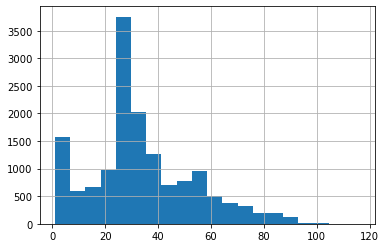

In [12]:
# load the datasets using the csv files train, val and test 
# (3)
train_set = pd.read_csv("./data/train.csv")
val_set = pd.read_csv("./data/val.csv")
test_set = pd.read_csv("./data/test.csv")

# print the shapes of the dataframes 
# (3)
print(f"train_set.shape = {train_set.shape}")
print(f"val_set.shape = {val_set.shape}")
print(f"test_set.shape = {test_set.shape}")

# print the column names from either one of the dataframes 
# (1)
print(f"columns: {train_set.columns}\n")

# print the proportional distribution of gender in all three datasets(i.e., number of male and female) 
# (3)
print(f"gender distribution in train_set:\n {test_set['gender'].value_counts()}")
print(f"gender distribution in val_set:\n {val_set['gender'].value_counts()}")
print(f"gender distribution in test_set:\n {test_set['gender'].value_counts()}\n")

# print the proportional distribution of ethnicity in all three datasets 
# (3)
print(f"ethnicity distribution in train_set:\n {test_set['ethnicity'].value_counts()}")
print(f"ethnicity distribution in val_set:\n {val_set['ethnicity'].value_counts()}")
print(f"ethnicity distribution in test_set:\n {test_set['ethnicity'].value_counts()} ")

# plot the age distribution from the training dataset where the x-axis plots the age
# and the y-axis depicts the count of individuals within each age group. For example, individuals with age=1 are:
# (2)
train_set["age"].hist(bins=20)
plt.show()

#### Create the ImageDataGenerators (22/100)

In [ ]:
# ImageDataGenerator is an iterator.

# specify the batch size hyperparameter. You can experiment with different batch sizes
batch_size = 16

# create the ImageDataGenerator with rescaling that will generate batched tensors representing images with real-time data augmentation
# use at least two of the augmentation strategies. For example, fill_mode='nearest'
# please refer: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
# (3)
train_img_gen = ImageDataGenerator(
   # TODO
)

# use the method "flow_from_dataframe" from the "ImageDataGenerator" instance to link the image folder and the dataframe.
# also include the, batch size, image size and the seed.
# make sure to include the following arguments
# color_mode='grayscale', class_mode='multi_output'
# please refer: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
# (5)
# TODO


# similarly, create an ImageDataGenerator for the validation dataset and make sure not to use any of th eaugmentation strategies except rescaling the image
# (2)
val_img_gen = ImageDataGenerator(
    # TODO
)

# use the method "flow_from_dataframe" from the "ImageDataGenerator" instance with the same arguments as above
# make sure to specify the following arguments:
# class_mode='multi_output', color_mode='grayscale', shuffle=False
# (5)
# TODO

# use the method "flow_from_dataframe" from the val_img_gen instance to link the test dataframe and the test data folder
# In addition, make sure to specify the following arguments
# class_mode='multi_output', color_mode='grayscale', shuffle=False
# (5)
# TODO


# enumerate through the validation data generator created above and plot first grayscale image 
# (2)
for i, element in enumerate():
    # TODO
    break

#### Create the model (44/100)

In [ ]:
# specify the model input with the required shape 
# (1)
# TODO

# The shared layers
# Include at least one Conv2D layer, MaxPooling2D layer and a Flatten layer
# you can have as many layers as possible, but make sure not to overfit your model using the training data
# TODO
# (10)

# Task specific layers
# Include at least one Dense layer as a task specific layer before generating the output for age
# TODO
# (2)

# Include the age output and make sure to include the following arguments
# activation='linear', name='xxx'(any name)
# make sure to name your output layers so that different metrics to be used can be linked accordingly
# please note that the age prediction is a regression task
# TODO
# (2)

# Similar to above, specify one or more Dense layers as task specific layers for ethnicity prediction
# TODO
# (2)
# Include the ethnicity output that uses the task specific output from the layer above
# please note that the ethnicity prediction is a multi-class classification task
# TODO
# (2)

# Similar to above, specify one or more Dense layers as task specific layers for gender prediction
# TODO
# (2)
# Include the gender output that uses the task specific output from the layer above
# please note that the ethnicity prediction is a binary classification task
# TODO
# (2)

# create the model with the required input and the outputs.
# pelase make sure that the outputs can be included in a list and make sure to keep note of the order
# TODO
# (3)

# print the model summary
# TODO
# (0.5)

# Instantiate the optimizer with the learning rate. You can start with the learning rate 1e-3(0.001).
# Both the optimizer and the learning rate are hyperparameters that you can finetune
# For example, you can start with the "RMSprop" optimizer
# TODO
# (2)

# specify the losses to be used for each task: age, ethnicity and gender prediction 
# (0.5)
losses = []
# compile the model with the optimizer, loss, loss_weights and the metrics for each task
# apply the following weights to the losses to balance the contribution of each loss to the total loss
# loss_weights=[0.001, 0.5, 0.5]
# please remember to use the relevant metric for each task by assigning it to the correct output
# TODO
# (2)

# Define the callbacks
# EarlyStopping: monitor the validation loss while waiting for 3 epochs before stopping
# can restore the best weights
# TODO
# (2)

# ModelCheckpoint
# monitor validation loss and save the best model weights
# TODO
# (2)

# Initiallize TensorBoard
# TODO
# (2)

# ReduceLROnPlateau
# reduce the learning rate by a factor of 0.1 after waiting for 2 epochs while monitoring validation loss
# specify a minimum learning rate to be used
# TODO
# (2)

# fit the model with training and validation generators
# In addition please specify the following arguments
# steps_per_epoch=len(df_train)/batch_size
# validation_steps=len(df_val)/batch_size
# (5)

#### Making predictions on test data (14/100)

In [ ]:
# evaluate the trained model using the test generator
# print only the test accuracy for ethnicity and gender predictions
(4)

In [ ]:
# generate predictions using the test generator
(2)

# extract the ethnicity predictions
(2)
# print the classification report for predicting ethnicity
(2)

# extract the gender predictions where probabilities above 0.5 are considered class 1 and if not, class 0
(2)
# print the classification report for predicting gender
(2)

#### Present prediction results on test data(5/100)

Present your findings for 5 different runs by fine-tuning the hyperparameters. The results table must contain the following fields
- A minimum of 5 hyperparameters that you have fine-tuned
- Mean absolute error for age
- Accuracy for ethnicity prediction
- Accuracy for gender prediction
Please use a table format similar to the one mentioned below when presenting the results.

| Hyperparameters | Age(MAE) | Ethnicity(Accuracy)| Gender(Accuracy) |
|-----------------|----------|--------------------|------------------|
|                 |          |                    |                  |
|                 |          |                    |                  |
|                 |          |                    |                  |
|                 |          |                    |                  |
|                 |          |                    |                  |
